# simple linear regression

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [15]:
df=pd.read_csv('Salary_dataset.csv')
df.shape,df.head()

((30, 3),
    Unnamed: 0  YearsExperience   Salary
 0           0              1.2  39344.0
 1           1              1.4  46206.0
 2           2              1.6  37732.0
 3           3              2.1  43526.0
 4           4              2.3  39892.0)

In [16]:
df.drop(columns=df.columns[0],axis=1,inplace=True)
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [17]:
target=df['Salary']
feature = df.drop(columns=['Salary'])
feature

,YearsExperience
0,1.2
1,1.4
2,1.6
3,2.1
4,2.3
5,3.0
6,3.1
7,3.3
8,3.3
9,3.8


In [18]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,train_size=0.7,random_state=10)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(21, 1)
(9, 1)
(21,)
(9,)


In [20]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [38]:
x_test

,YearsExperience
20,6.9
7,3.3
5,3.0
2,1.6
3,2.1
21,7.2
13,4.2
27,9.7
12,4.1


In [32]:
y_pred = model.predict(x_test)
print(r2_score(y_test, y_pred)*100 ,'%')

96.47278344670828 %


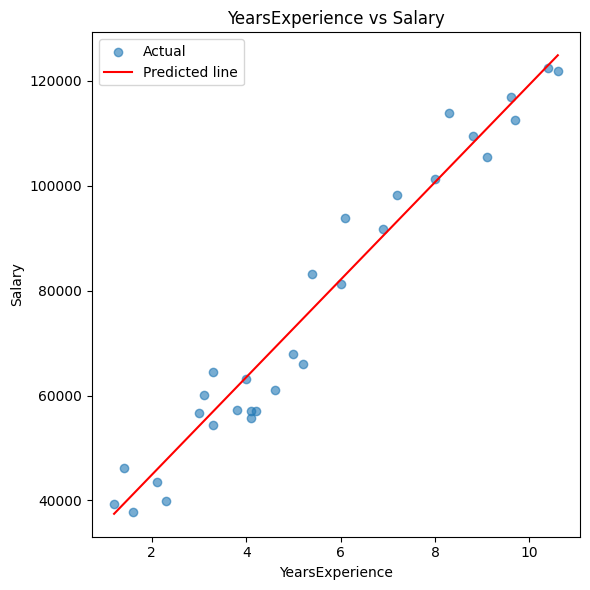

In [43]:
import matplotlib.pyplot as plt

# Actual data points
plt.figure(figsize=(6, 6))
plt.scatter(feature.iloc[:, 0], target, alpha=0.6, label='Actual')

# Regression line (predicted for all data)
plt.plot(feature.iloc[:, 0], y_pred_all, color='red', label='Predicted line')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('YearsExperience vs Salary')
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
single_sample = pd.DataFrame([[2.1]], columns=feature.columns)
print(model.predict(single_sample))

[45815.34756686]


# Multiple Linear Regression
Multiple Linear Regression predicts a continuous target using more than one feature.
Instead of fitting a line, we now fit a plane or hyperplane.

##### When Do We Use Multiple Linear Regression?

Use it when:

* Target is continuous

* Relationship is approximately linear

* Multiple factors influence the outcome

Examples : Salary prediction, Demand forecasting, Cost estimation

In [55]:
import pandas as pd


df = pd.read_csv('Housing_data.csv')
df


,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,16858,1629,1.0,3,0.76,180,0
1,26049,1344,2.0,3,0.92,13,0
2,26130,822,1.0,2,0.56,173,0
3,31113,1540,1.0,2,0.04,115,0
4,40932,1320,1.0,3,0.17,90,0
...,...,...,...,...,...,...,...
1042,387652,3504,2.5,5,0.90,0,1
1043,391842,3003,3.5,4,0.46,88,1
1044,394532,3361,3.5,4,0.71,1,1
1045,432845,3250,2.5,3,0.53,23,1


In [57]:
df[df.duplicated()]

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
72,84291,924,1.0,3,0.91,15,0
124,95708,912,1.5,2,0.16,20,0
135,98389,1184,1.5,2,0.15,18,0
196,104556,1673,2.0,2,0.15,18,0
329,120639,1498,1.5,2,0.18,0,1
364,126082,1592,1.5,3,0.16,18,1
552,155787,1540,1.5,3,0.43,16,0
673,178216,1512,2.0,3,0.77,12,1
839,218184,2655,2.5,4,0.37,1,1
885,233876,2434,2.5,4,1.00,20,1


In [58]:
df.drop_duplicates(inplace=True,ignore_index=True)
df[df.duplicated()]

,Price,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace


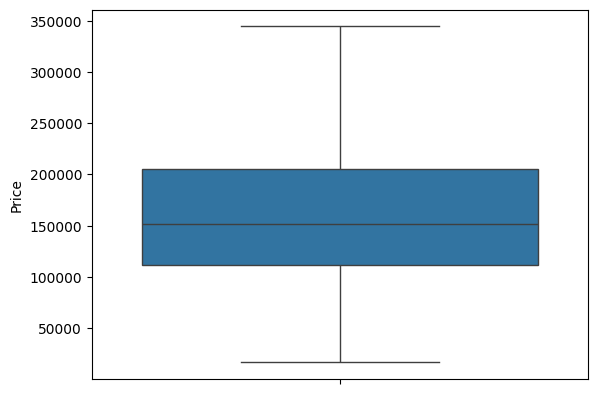

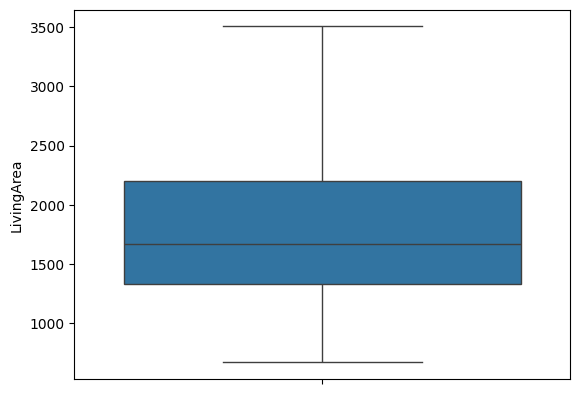

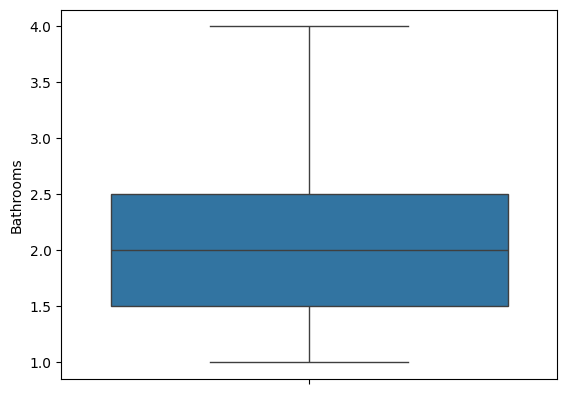

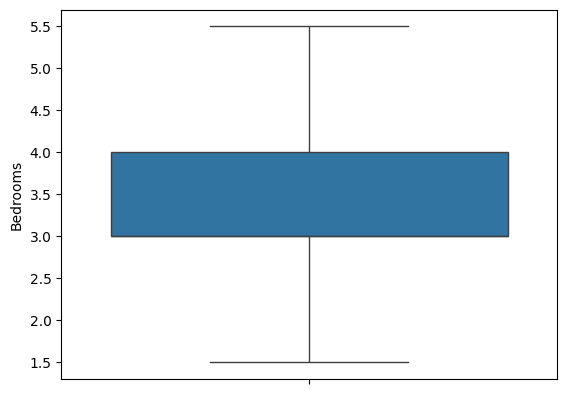

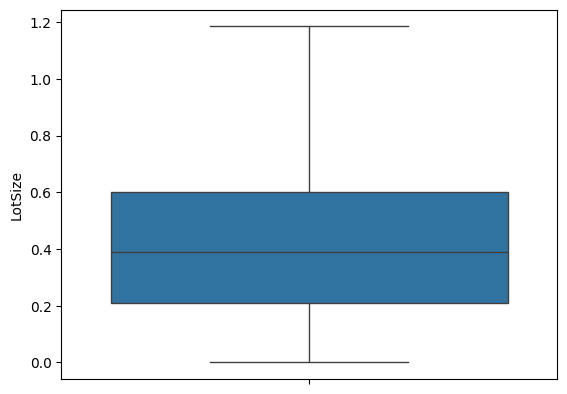

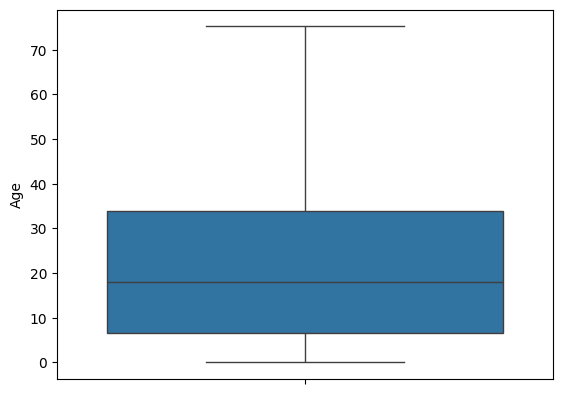

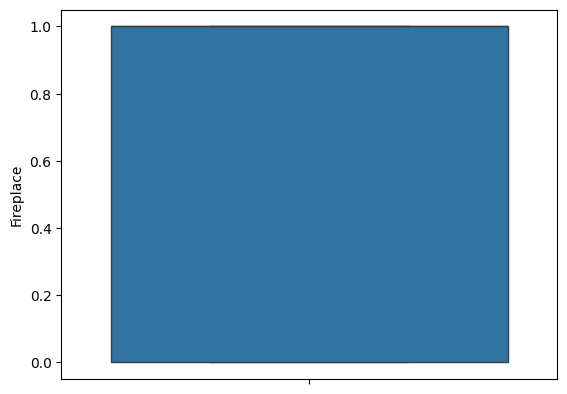

In [61]:
for col in df.columns:
    sns.boxplot(data=df,y=col)
    plt.show()

In [60]:
# Outlier Capping
def outlier_capping(df,columns):
    Q1= df[columns].quantile(0.25)
    Q3= df[columns].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[columns]= df[columns].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(include=['int','float']).columns:
    outlier_capping(df,col)

<Axes: >

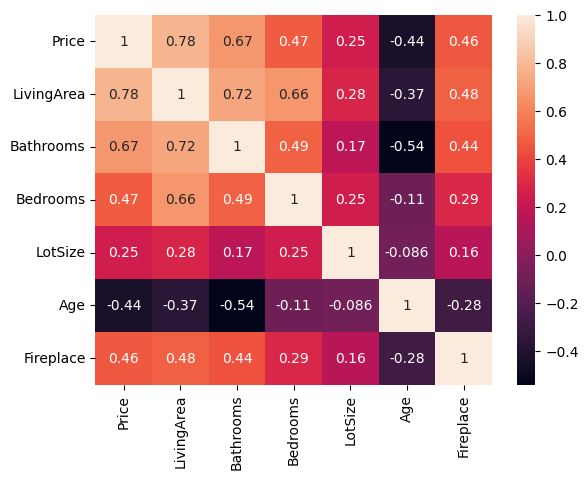

In [63]:
### Feature selection
corr= df.corr()
sns.heatmap(corr,annot=True)

In [64]:
y= df[['Price']]
X= df.drop(columns=['Price'])
X.head()

,LivingArea,Bathrooms,Bedrooms,LotSize,Age,Fireplace
0,1629.0,1.0,3.0,0.76,75.25,0
1,1344.0,2.0,3.0,0.92,13.00,0
2,822.0,1.0,2.0,0.56,75.25,0
3,1540.0,1.0,2.0,0.04,75.25,0
4,1320.0,1.0,3.0,0.17,75.25,0


C:\Users\Kaveeshvar\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<Axes: >

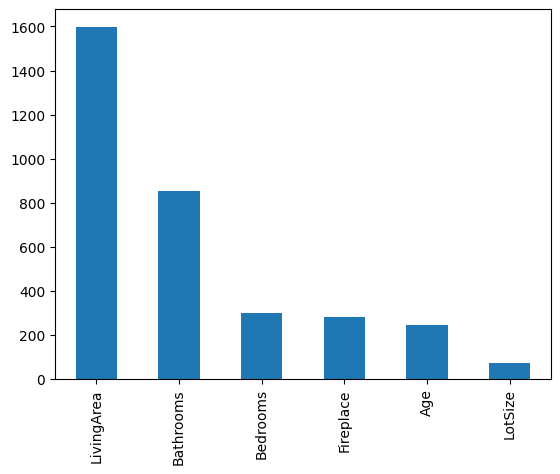

In [ ]:
# Feature selection using f_regression
from sklearn.feature_selection import f_regression
f_reg= f_regression(X,y)
pd.Series(f_reg[0],index=X.columns).sort_values(ascending=False).plot(kind='bar')

In [66]:
#### Mulitcolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [69]:
# VIF calculation
for i in range(len(X.columns)):
    print(i)
X.values

0
1
2
3
4
5


array([[1.629e+03, 1.000e+00, 3.000e+00, 7.600e-01, 7.525e+01, 0.000e+00],
       [1.344e+03, 2.000e+00, 3.000e+00, 9.200e-01, 1.300e+01, 0.000e+00],
       [8.220e+02, 1.000e+00, 2.000e+00, 5.600e-01, 7.525e+01, 0.000e+00],
       ...,
       [3.361e+03, 3.500e+00, 4.000e+00, 7.100e-01, 1.000e+00, 1.000e+00],
       [3.250e+03, 2.500e+00, 3.000e+00, 5.300e-01, 2.300e+01, 1.000e+00],
       [3.467e+03, 2.500e+00, 4.000e+00, 3.400e-01, 3.000e+00, 1.000e+00]],
      shape=(1035, 6))

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data=pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [
    variance_inflation_factor(X.values, i)
    for i in range(X.shape[1])
]

vif_data.sort_values(by='VIF',ascending=False)

,Feature,VIF
2,Bedrooms,29.100456
0,LivingArea,28.393716
1,Bathrooms,21.617158
3,LotSize,3.345417
5,Fireplace,3.304989
4,Age,2.471556


In [73]:
X.drop(columns=['LotSize'],inplace=True)

In [74]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size=0.2,random_state=42
)

In [76]:
X_train.head()

,LivingArea,Bathrooms,Bedrooms,Age,Fireplace
518,1890.0,2.0,4.0,30.0,1
355,1760.0,1.0,4.0,37.0,1
528,1720.0,2.0,4.0,31.0,1
445,1900.0,1.5,3.0,12.0,1
987,2310.0,3.0,2.0,23.0,1


In [78]:
from sklearn.preprocessing import StandardScaler

std_sca=StandardScaler()

In [ ]:
# Scale 'LivingArea' and 'Age' columns to standard normal distribution. This is important for linear regression to perform well because these features may have different scales.
X_train[['LivingArea','Age']]= std_sca.fit_transform(X_train[['LivingArea','Age']]) # fit and transform on train data because we have to learn the parameters from train data
X_test[['LivingArea','Age']]= std_sca.transform(X_test[['LivingArea','Age']]) # only transform on test data

In [81]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [83]:
model.coef_

array([[43706.0154557 , 17195.76391879, -7570.01045421, -5590.49599767,
        10699.71497176]])

In [84]:
model.intercept_

array([148881.86173789])

In [90]:
y_pred = model.predict(X_test)
y_pred

array([[114371.94513055],
       [174570.76146877],
       [169165.98346855],
       [ 52791.03907136],
       [184300.76108676],
       [127718.77567802],
       [114793.63962358],
       [169413.79619321],
       [ 68831.79639166],
       [122135.49940308],
       [209948.74929222],
       [173194.83520005],
       [241853.69946217],
       [136474.72031969],
       [120653.77730115],
       [ 93722.07531494],
       [127396.82505143],
       [ 77683.85779155],
       [145412.29566575],
       [232492.0616378 ],
       [215809.09933153],
       [205252.37264125],
       [255428.64111716],
       [169524.51956767],
       [215316.06857225],
       [184805.65001782],
       [189108.68044969],
       [223044.14170874],
       [203582.30156617],
       [ 77571.67378152],
       [160857.98946035],
       [129496.00404752],
       [174807.87893331],
       [147297.68785374],
       [233255.81750278],
       [140911.46017631],
       [ 77300.65910191],
       [288174.92327374],
       [ 896

In [88]:
# Training Validation
y_pred = model.predict(X_train)
r2_score(y_train,y_pred)    

0.658759769118092

In [91]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

mse,r2

# MSE: average squared prediction error (lower is better)

# R²: proportion of variance explained (closer to 1 is better)

(1585754128.38881, 0.5968981165035818)

In [93]:
# Understanding Coefficients
coefficients = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_[0]
})

coefficients


,Feature,Coefficient
0,LivingArea,43706.015456
1,Bathrooms,17195.763919
2,Bedrooms,-7570.010454
3,Age,-5590.495998
4,Fireplace,10699.714972


In [52]:
model.intercept_

np.float64(-30000.000000000044)

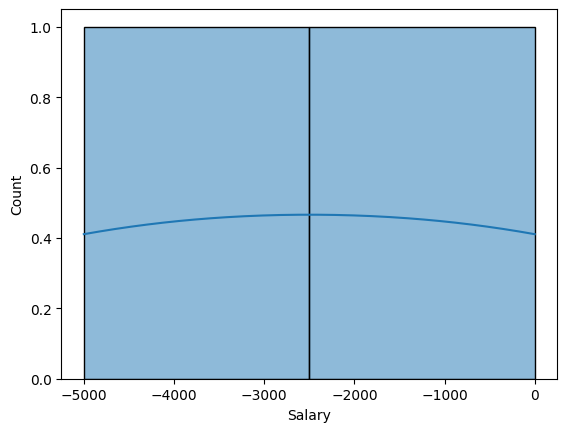

In [54]:
# Residual Analysis (Model Health)
residuals = y_test - y_pred
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(residuals, kde=True)
plt.show()


<Axes: xlabel='Price'>

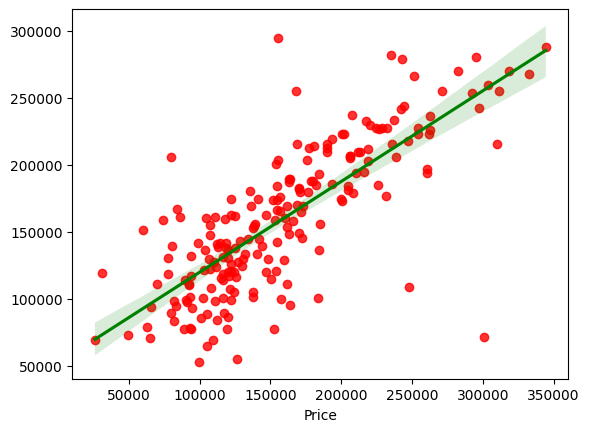

In [94]:
# Regression plot
# Red dots- actual values, Green line- predicted values
sns.regplot(x=y_test,y=y_pred,scatter_kws={"color":"red"}, line_kws={"color":"green"})

In [95]:
# Adjusted R-squared
n = X_test.shape[0]
p = X_test.shape[1]
n,p

(207, 5)

In [97]:
adj_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
r2, adj_r2
# Here the difference between R-squared and Adjusted R-squared is very less (It should be less than 0.05 for a good model)

(0.5968981165035818, 0.5868707064663574)

In [99]:
# Error Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error
import numpy as np

# Mean Squared Error, Mean Absolute Error, Mean Absolute Percentage Error
mse = np.round(mean_squared_error(y_test,y_pred), 2)
mae = np.round(mean_absolute_error(y_test,y_pred), 2)
mape = np.round(mean_absolute_percentage_error(y_test,y_pred)*100, 2)
rmse= np.round(np.sqrt(mse), 2)
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("Mean Absolute Percentage Error:",mape)
print("Root Mean Squared Error:",rmse)

Mean Squared Error: 1585754128.39
Mean Absolute Error: 28008.06
Mean Absolute Percentage Error: 21.84
Root Mean Squared Error: 39821.53
